# InstaBot - Part 2
1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
   1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and           find the top 5 which have the highest number of followers
   2. Now Find the number of posts these handles have done in the previous 3 days.
   3. Depict this information using a suitable graph.
2. Your friend also needs a list of hashtags that he should use in his posts.
   1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
   2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
   3. Create a csv file with two columns : the word and its frequency
   4. Now, find the hashtags that were most popular among these bloggers
   5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
3. You need to also calculate average followers : likes ratio for the obtained handles.
      Followers : Likes ratio is calculated as follows:
   1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
   2. Calculate the average likes for a handle.
   3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each         handle.
   4. Create a bar graph to depict the above obtained information.

# ------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------

### For Running this kernal , enter username and password inplace of SAMPLE USERNAME and SAMPLE PASSWORD in second cell respectively

1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
   1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles          and find the top 5 which have the highest number of followers

In [1]:
#importing library and class for webdriver and for explicte waiting
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait#for using explicite waiting
from selenium.webdriver.support import expected_conditions as EC# for locating certain element
from selenium.webdriver.common.by import By# for by which condition we want to locate
import time

In [2]:
# executing a new chrome driver to open Instagram and login into it

driver=webdriver.Chrome(executable_path="/Users/karna/Desktop/chromedriver")
driver.maximize_window()

#driver opening website of Instagram
driver.get("https://www.instagram.com/")

# it is for explicite waiting for 10 sec, when ever waiting required We will use it 
wait=WebDriverWait(driver,10)

#locating the area where we can enter username
email1=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"_2hvTZ")))

#entering the usename
email1.send_keys("SAMPLE USERNAME")

#locating the area and sending the password
driver.find_element_by_name("password").send_keys("SAMPLE PASSWORD")

#now submiting the username and password
driver.find_element_by_class_name("sqdOP").submit()

#locating the popup-window
clickable=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"cmbtv")))
clickable.click()

#locating againg the popup_window
clickable=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"HoLwm")))
clickable.click()

In [3]:
import time
driver.get("https://www.instagram.com/")
driver.find_element_by_class_name("pbgfb").click()# locating the search bar
driver.find_element_by_class_name("XTCLo").send_keys("food")# searching food
food_list=wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"Ap253")))# making list of searched object when food is searched
for i in range(10):
    food_list[i]=food_list[i].text #extracting the username of searched object
follower=[]# list which will save name of blogger and its number of followers
driver.get("https://www.instagram.com/")
for i in food_list[0:10]:# repeating below process for first 10 blogger
    searchbar=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"pbgfb")))
    searchbar.click()
    driver.find_element_by_class_name("XTCLo").send_keys(i)
    enter_to=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"Ap253")))
    enter_to.click()
    follower_number=wait.until(EC.presence_of_element_located((By.XPATH,"//ul[@class='k9GMp ']//a/span")))# locating the follower button
    follower_number=int(follower_number.get_attribute('title').replace(',',""))# extracting the number of followers

    follower.append([follower_number,i])
    driver.get("https://www.instagram.com/")
follower.pop(6)# removing it because there is also blogger with name 'food', and as on typing food in search bar first option is not this blogger

follower.sort()# it sort according to number of followers
follower=follower[4:9]# selecting the first 5 highest follower numbers
follower.reverse()
print("Top 5 Handles:  Number of Followers ")
print()
for i in range(5):
    print(follower[i][1]," : ",follower[i][0])

driver.get("https://www.instagram.com/")

    
    

Top 5 Handles:  Number of Followers 

foodnetwork  :  10266193
foodgod  :  3603786
foodinsider  :  2175425
dilsefoodie  :  487759
foodtalkindia  :  297076


# --------------------------------------------------------------------------------------------------------

1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
   1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [4]:
driver.get("https://www.instagram.com/")
blogger_post=[]# will contain the list of blogger name and its number of post in the previous 3 days
for i in range(5):# this loop continue for top 5 blogger
    post_number=0
    searchbar=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"pbgfb")))
    searchbar.click()
    driver.find_element_by_class_name("XTCLo").send_keys(follower[i][1])# searching each blogger in search bar
    
    enter_to=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"Ap253")))
    enter_to.click() # clicking on searched blogger
    time.sleep(3)
    post=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"eLAPa")))# locating the first post

    a=post
    a.click()# clicking on first post

    while(True):# this loop is till the post who is uploaded under 3 days
        timing=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"_1o9PC ")))# locating the time of posted
        
        timing=str(timing.text)# converting time of posted into string
        
        timing=timing.split(' ')
        if(timing[1]=="HOURS" or timing[1]=="HOUR" or timing[1]=="MINUTES" or timing[1]=="MINUTE"):# if time contains hours,minutes, then it must be discarded as it doesnot come under previous 3 days
            driver.find_element_by_class_name("coreSpriteRightPaginationArrow").click()# clicking on next post
            continue
        elif(timing[1]=="DAYS" or timing[1]=="DAY"):# if time contains day, then it can be cared for under 3 days
            if(int(timing[0])<=3):
                post_number+=1
            else:
                break
        else:
            break
        driver.find_element_by_class_name("coreSpriteRightPaginationArrow").click()# clicking on next post

    blogger_post.append([follower[i][1],post_number])# appending the post if it is in under time
    driver.get("https://www.instagram.com/")# again refreshing the page for other blogger posts


print("Top 5 Blogger   Number of Posts")
for i in blogger_post:
    print(i[0]," : ",i[1])

    

Top 5 Blogger   Number of Posts
foodnetwork  :  28
foodgod  :  0
foodinsider  :  1
dilsefoodie  :  2
foodtalkindia  :  4


# --------------------------------------------------------------------------------------------------------

1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
   1.3 Depict this information using a suitable graph.

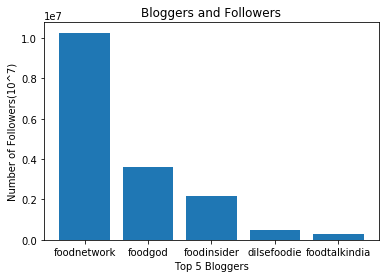

****************************************************************************************************************************


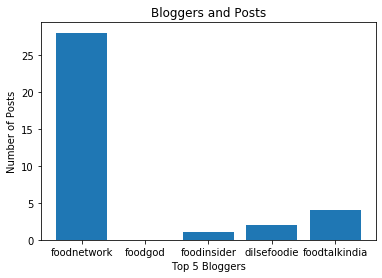

In [5]:
blogger=[]
posts=[]
followers=[]
for i in range(5):
    blogger.append(follower[i][1])# appending the name of blogger
    followers.append(follower[i][0])# appending the number of followers of each blogger
    posts.append(blogger_post[i][1])# appending the number of posts posted by blogger in previous 3 days
import matplotlib.pyplot as plt
plt.bar(blogger,followers)
plt.xlabel("Top 5 Bloggers")
plt.title("Bloggers and Followers")
plt.ylabel("Number of Followers(10^7)")
plt.show()
print("****************************************************************************************************************************")
plt.bar(blogger,posts)
plt.title("Bloggers and Posts")
plt.xlabel("Top 5 Bloggers")
plt.ylabel("Number of Posts")
plt.show()


# ------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------

2. Your friend also needs a list of hashtags that he should use in his posts.
   2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [6]:
driver.get("https://www.instagram.com/")

content_of_post={}# dictionary in which keys are blogger names and values is list of content of first 10 posts
content_of_word=[]#  basically it contains the word of each blogger posts as string
for i in range(5):# this loop continues for each blogger
    post_number=0
    content_of_post[blogger[i]]=[]# adding new keys with blogger name
    driver.find_element_by_class_name("pbgfb").click()# locating search bar
    driver.find_element_by_class_name("XTCLo").send_keys(blogger[i])# searching blogger
    enter_to=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"Ap253")))
    enter_to.click()# clicking on searched blogger
    time.sleep(3)
    post=driver.find_element_by_class_name("eLAPa")# locating the first post
    post.click()
    for j in range(10):
        tex=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"C4VMK")))# locating the content of post

        content_of_post[blogger[i]].append(tex.text)# appending the content of post
        content_of_word=content_of_word+(tex.text).split()# adding content of post as words
        driver.find_element_by_class_name("coreSpriteRightPaginationArrow").click()# clicking for next post
    driver.get("https://www.instagram.com/")
for i in content_of_post:
    print(i," : ",content_of_post[i])
    print()
    print()
        

foodnetwork  :  ["foodnetwork\nVerified\nYou'll want to add @conantnyc's Spaghetti with Shrimp, Mussels and Baby Tomatoes to your dinner rotation ASAP — trust us 😍Make it with Scott as he goes LIVE on the @foodnetworkkitchen app tomorrow at 4|3c. Download the app with the link in our bio, and start coming up with your questions now.\n4h", 'foodnetwork\nVerified\nCaribbean Jerk Sliders (with @chefeddiejackson)\n\n@ChefEddieJackson turns up the HEAT with a spicy jerk dry rub on these cheese-smothered, onion ring-topped sliders.\n\n#TheKitchen > Saturdays at 11a|10c\n\nGet the recipe now on your @FoodNetworkKitchen app!\n6h', "foodnetwork\nVerified\nA cake topped with juicy clementine slices is the sunshine we need today ☀️🍊 Click the link in our bio to take @emcdowell's Clementine Polenta Cake on your @FoodNetworkKitchen app!\n8h", 'foodnetwork\nVerified\nNo one knows the restaurant industry quite like @chefirvine. As more and more businesses prepare to reopen these days, many restaurant

# --------------------------------------------------------------------------------------------------------

2. Your friend also needs a list of hashtags that he should use in his posts.
   2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.


In [7]:
import pandas as pd
content_of_postseries=pd.Series(content_of_word)# as content_of_word variable is obtained before, here converting list of word into series
frequency_of_each_word=content_of_postseries.value_counts()# counting the each word appered
word=frequency_of_each_word.index
frequency=frequency_of_each_word.values
df=pd.DataFrame(word,columns=["Word"])
df["Frequency"]=frequency
print(df)



               Word  Frequency
0               the         77
1               and         59
2                to         52
3          Verified         49
4                of         38
...             ...        ...
1240      nominated          1
1241           Salt          1
1242             No          1
1243          4|3c.          1
1244  #chickenrarra          1

[1245 rows x 2 columns]


# --------------------------------------------------------------------------------------------------------

2. Your friend also needs a list of hashtags that he should use in his posts.
   2.3. Create a csv file with two columns : the word and its frequency

In [8]:
df.to_csv('word_frequency',index=False) # converting pandas dataframe to csv file with name "word_frequency"

# --------------------------------------------------------------------------------------------------------

2. Your friend also needs a list of hashtags that he should use in his posts.
   2.4. Now, find the hashtags that were most popular among these bloggers


In [9]:
hashtag=content_of_postseries[content_of_postseries.str.startswith('#')]# only selecting that words from series with starts with '#'
print(hashtag.value_counts().index[0])#delsefoodie is popular because it appears most number of times i.e 10 times

#dilsefoodie


# --------------------------------------------------------------------------------------------------------

2. Your friend also needs a list of hashtags that he should use in his posts.
   2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

Hashtags    Number of times appeared
#dilsefoodie    10
#food            8
#FoodInsider     7
#Plumazing       2
#pizza           2
dtype: int64


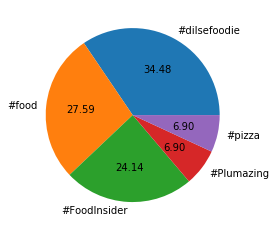

In [10]:
top_5_hashtag=hashtag.value_counts()[0:5]# giving top five hashtag
print("Hashtags    Number of times appeared")
print(top_5_hashtag)
import matplotlib.pyplot as plt
plt.pie(top_5_hashtag.values,labels=top_5_hashtag.index,autopct="%.2f")
plt.show()

# ------------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------

3. You need to also calculate average followers : likes ratio for the obtained handles.
      Followers : Likes ratio is calculated as follows:
   3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [11]:
driver.get("https://www.instagram.com/")
likes={}# dictionary in which keys is blogger name values is total like in first 10 posts
for i in range(5):# this loop for each top 5 bloggers
    driver.find_element_by_class_name("pbgfb").click()# locating search bar of instagram
    driver.find_element_by_class_name("XTCLo").send_keys(blogger[i])# searching the blogger username and entering into it in next line
    enter_to=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"Ap253")))

    likes[blogger[i]]=[]# entering new keys into likes dictionary
    enter_to.click()
    time.sleep(3)
    post=driver.find_element_by_class_name("eLAPa")# cliking on first post
    post.click()
    wait=WebDriverWait(driver,3)
    for j in range(10):
        try:
            a=wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'Nm9Fw')]")))# locating the number of likes, it couldnot locate the action transfer to except section
            a=a.text.split(' ')
            if(len(a)>2):
                a=a[-2]
                a=int(a.replace(',',''))# extracting the number of likes
                a=a+1

            else:
                a=a[0]
                a=int(a.replace(',',''))
            likes[blogger[i]].append(a)# appending the likes into keys
            driver.find_element_by_class_name("coreSpriteRightPaginationArrow").click()# clicking for next posts

        except:
            view=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"vcOH2")))# locating the number of view and clicking in next line
            view.click()
            a=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"vJRqr")))# locating the number of likes that appear as pop-up
            a=int(a.text.split(" ")[0].replace(',',''))# extracting the number of likes
            likes[blogger[i]].append(a)# appening the number of likes
            remove=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"QhbhU")))#remving the pop-up in which number of likes appeared
            remove.click()

            driver.find_element_by_class_name("coreSpriteRightPaginationArrow").click()# clicking for next posts
        


    driver.get("https://www.instagram.com/")
    
for i in likes:
    print(i ," : ",*likes[i])

foodnetwork  :  2416 19372 4981 3929 6492 13083 29231 37374 7858 3808
foodgod  :  5090 10275 21872 36045 5373 21508 40037 7573 32815 14647
foodinsider  :  5025 15499 15174 15082 13568 36574 9695 7512 20669 4954
dilsefoodie  :  6856 8329 4939 8774 11765 7888 10745 15770 5498 11621
foodtalkindia  :  243 2695 3207 2472 2095 2450 475 1140 968 275


# --------------------------------------------------------------------------------------------------------

3. You need to also calculate average followers : likes ratio for the obtained handles.
      Followers : Likes ratio is calculated as follows:
   3.2 Calculate the average likes for a handle.
   

In [12]:
import pandas as pd
avg_likes={}# this dictionary contains blogger name as keys and average likes as values
for i in likes:
    avg_likes[i]=sum(likes[i])/10
print("Blogger       Average Likes")
print()
avg_likes_series=pd.Series(avg_likes)# converting dictionary into series

print(avg_likes_series)

Blogger       Average Likes

foodnetwork      12854.4
foodgod          19523.5
foodinsider      14375.2
dilsefoodie       9218.5
foodtalkindia     1602.0
dtype: float64


# --------------------------------------------------------------------------------------------------------

3. You need to also calculate average followers : likes ratio for the obtained handles.
      Followers : Likes ratio is calculated as follows:
   3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of         each handle.

In [13]:
followers_to_avg_likes={}# this dictionary contains keys as blogger name and values as number of follower by avg likes
j=0
for i in avg_likes:
    followers_to_avg_likes[i]=followers[j]/avg_likes[i]
    j=j+1
followers_to_avg_likes_series=pd.Series(followers_to_avg_likes)# convering to series
print("Blogger        Follower:Average Likes")
print()
print(followers_to_avg_likes_series)

Blogger        Follower:Average Likes

foodnetwork      798.652057
foodgod          184.587087
foodinsider      151.331808
dilsefoodie       52.910886
foodtalkindia    185.440699
dtype: float64


# --------------------------------------------------------------------------------------------------------

3. You need to also calculate average followers : likes ratio for the obtained handles.
      Followers : Likes ratio is calculated as follows:
   3.4 Create a bar graph to depict the above obtained information.

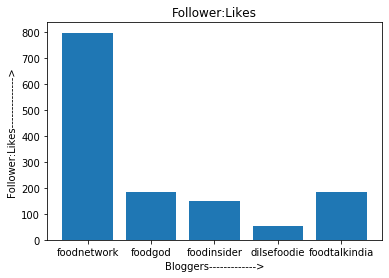

In [14]:
import matplotlib.pyplot as plt
plt.bar(followers_to_avg_likes_series.index,followers_to_avg_likes_series.values)
plt.title("Follower:Likes")
plt.ylabel("Follower:Likes-------------->")
plt.xlabel("Bloggers------------->")
plt.show()

# --------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------